# **1. GBM - 와인 데이터셋**

*   Wine 데이터셋을 활용합니다.











# **1-1. GBM 수행시간 측정**


*   아래의 셀을 실행시킨 후에 실습을 진행해주세요.







In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 와인 데이터를 로드
wine = load_wine()
# 와인 데이터에서 feature 로 되어있는 데이터를 갖고 오기
wine_data = wine.data
# 와인 데이터에서 target 데이터를 갖고 오기
wine_target = wine.target
# wine 데이터의 feature, target로 Dataframe을 만들기
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
# feature 만 있는 데이터 프레임에 타겟 데이터를 추가하기
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.3)

print(X_train.shape, X_test.shape)

(124, 13) (54, 13)


# **문제 1**

* GradientBoostingClassifier 클래스를 이용하여 와인 데이터 세트 예측/분류
* GBM 정확도 & 학습 시간 측정
*   빈칸을 채워주세요.

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9444
GBM 수행 시간: 0.9 초 


# **1-2. GBM 하이퍼 파라미터 튜닝**

# **문제 2**

*   GBM 하이퍼 파라미터를 튜닝하기 위한 빈칸을 채워주세요.










In [6]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.02, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("GBM 정확도: {0:.4f}".format(gb_accuracy))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}
최고 예측 정확도: 0.9435
GBM 정확도: 0.9444


# **문제 3. 질문에 대한 답안을 작성해주세요.**

위의 실행 결과를 바탕으로, 'n_estimators'와 'learning_rate' 하이퍼 파라미터 관련 질문에 대한 답안을 작성하세요.

# **답안**

*   마크다운을 풀어서 작성해주세요

1) n_estimators의 개념

: weak learner의 개수

2) learning_rate의 개념

: 학습을 진행할 때마다 적용하는 학습률

2-1) 너무 작은 learning_rate를 적용할 경우 발생하는 현상

: learning rate가 작으면 업데이트 되는 값이 작아지기 때문에 최소 오류 값을 찾아 예측 성능이 높아질 수 있다. 하지만 수행 시간이 오래 걸리고, 너무 작은 값으로 설정할 경우 모든 반복 이후에도 최소 오류 값을 찾지 못 할 수도 있다.

2-2) 너무 큰 learning_rate를 적용할 경우 발생하는 현상

: 수행 시간은 빨라지지만 최소 오류 값을 찾지 못하고 지나쳐버려 예측 성능이 떨어질 수 있다.


# **2. XGBoost - 위스콘신 유방암 데이터 세트**


*   위스콘신 유방암 데이터 세트를 활용합니다.
*   아래의 셀을 실행시킨 후에 실습을 진행해주세요.



In [7]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0




*   타깃 레이블 값의 분포를 확인해보세요.




In [9]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


# **2-1. 검증용 데이터 세트 별도 분할하기**

# **문제 4**

*   빈칸을 채우세요.
*   초기 데이터의 80%를 학습용으로, 20%를 테스트용으로 추출한 뒤, 이 80%의 학습용 데이터에서 90%를 최종 학습용, 10%를 검증용으로 분할하세요. random_state = 156으로 설정하세요.



In [10]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features,y_label,test_size=0.2,random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [11]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# **문제 5**

* 마크다운을 풀고 답안을 작성하세요.

파이썬 래퍼 XGBoost는 사이킷런 래퍼 XGBoost과 여러가지 차이를 보이는데, 그 중 눈에 띄는 차이는 XGBoost만의 전용 데이터 객체인 '이것'을 사용한다는 것이다, '이것'의 명칭을 작성하세요.

: DMatrix

# **2-2. 하이퍼 파라미터 설정하기**

# **문제 6**

다음 조건에 맞게 하이퍼 파라미터를 설정하세요.

*   트리의 최대 깊이: 4

*   학습률(eta): 0.03

*   이진 분류 문제

*   오류 함수의 평가 성능 지표는 logloss

*   부스팅 반복 횟수: 300회














In [12]:
params = {'max_depth':4,'eta':0.03, 'objective':'binary:logistic','eval_metric':'logloss'



          }
num_rounds = 300

# **2-3. 조기 중단 성능 평가**

# **문제 7**

*   다음 셀을 실행시키고, 주어진 질문에 대한 답안을 작성하시오.




In [13]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr, 'train'),(dval, 'eval')] # 또는 eval_list = [(dval, 'eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=60, evals=eval_list)

[0]	train-logloss:0.64095	eval-logloss:0.63989
[1]	train-logloss:0.61640	eval-logloss:0.62173
[2]	train-logloss:0.59328	eval-logloss:0.60517
[3]	train-logloss:0.57147	eval-logloss:0.58956
[4]	train-logloss:0.55085	eval-logloss:0.57426
[5]	train-logloss:0.53123	eval-logloss:0.55997
[6]	train-logloss:0.51262	eval-logloss:0.54671
[7]	train-logloss:0.49504	eval-logloss:0.53364
[8]	train-logloss:0.47823	eval-logloss:0.52141
[9]	train-logloss:0.46175	eval-logloss:0.50911
[10]	train-logloss:0.44647	eval-logloss:0.49831
[11]	train-logloss:0.43191	eval-logloss:0.48804
[12]	train-logloss:0.41803	eval-logloss:0.47829
[13]	train-logloss:0.40433	eval-logloss:0.46832
[14]	train-logloss:0.39166	eval-logloss:0.45947
[15]	train-logloss:0.37954	eval-logloss:0.45058
[16]	train-logloss:0.36795	eval-logloss:0.44237
[17]	train-logloss:0.35685	eval-logloss:0.43426
[18]	train-logloss:0.34601	eval-logloss:0.42671
[19]	train-logloss:0.33582	eval-logloss:0.41958
[20]	train-logloss:0.32584	eval-logloss:0.41268
[2

# **문제 8**
* 마크다운을 풀어서 답안을 작성해주세요.


1. '조기 중단'에 대한 간략한 설명을 서술하시오.

: 조기 중단 파라미터를 n회라고 설정했을 때, n회를 반복하는 동안 오류가 감소하지 않으면 n_estimators가 되기 전에 학습을 종료하는 것이다.

2. 위의 코드를 실행시킨 결과, num_rounds를 300회로 설정하였음에도 불구하고 학습은 300회보다 적은 횟수로 반복되었습니다. 그 이유를 작성하고, 몇 번째 반복에서 eval-logloss로 표시되는 검증데이터의 값이 가장 낮은지 찾으세요.

: 170번째 반복에서 eval logloss의 값이 가장 낮고, 170번째 수행 이후로 60번째 수행이 되는 229번째 반복까지 오류가 감소하지 않았기 때문에 229번째 수행에서 멈춘 것이다.

* 남은 코드를 실행하여 결과를 확인해 보세요.

In [14]:
dtest = xgb.DMatrix(data=X_test, label=y_test)
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.928 0.006 0.739 0.144 0.98  0.998 0.998 0.997 0.996 0.003]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


# **2-4. 시각화**

# **문제 9**

*   빈칸을 채우고 실행하세요.
* 빈칸은 xgboost 패키지에 내장된 시각화 기능을 수행하는 함수입니다.



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

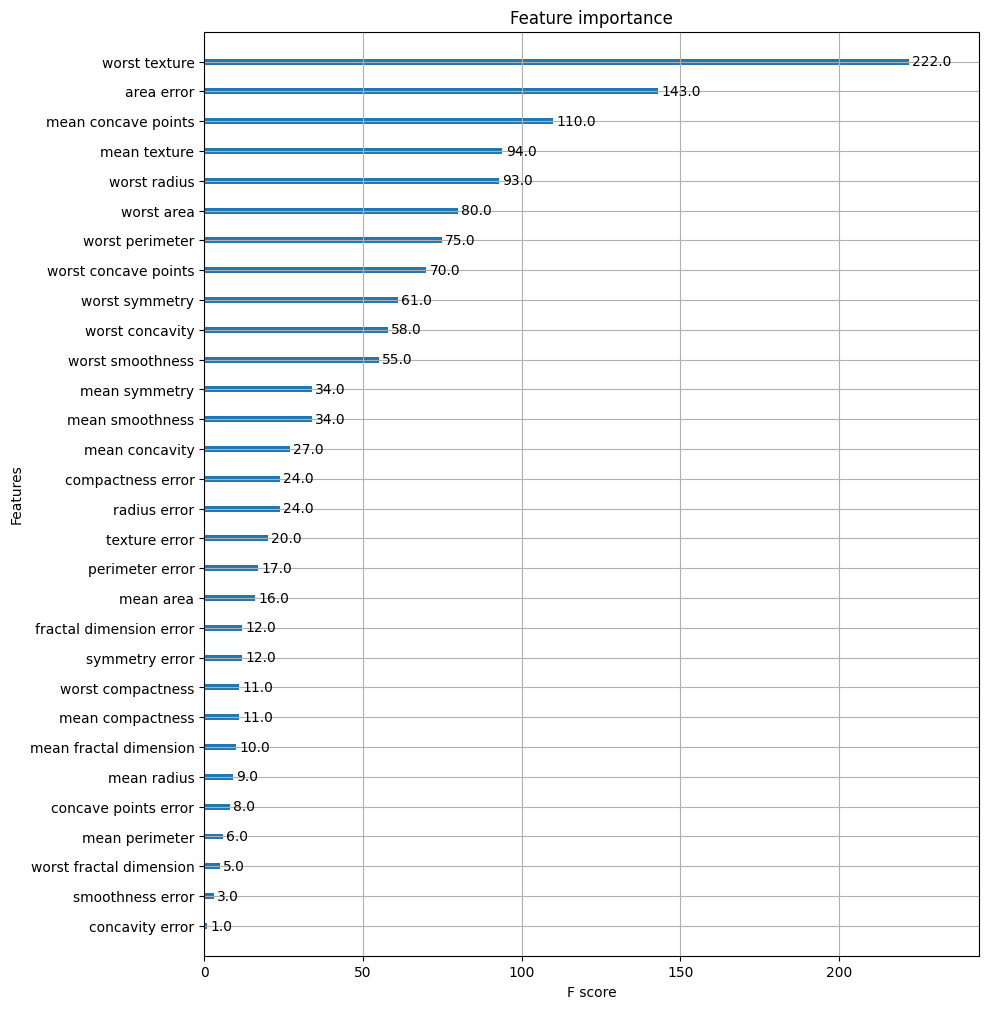

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

# 3. LightGBM
LightGBM 적용 문제입니다.

 ##답안## 칸에 문제 조건에 맞는 답안 코드를 작성해주세요!

## 문제 1) 아래 질문에 대해 마크다운을 풀고 답을 작성해 주세요!

### XGBoost에서 GridSearchCV로 하이퍼 파라미터 튜닝을 수행했을 때 어떠한 문제점이 발생하나요? 문제가 되게 하는 XGBoost의 특징은 무엇인가요?

**답**

#######################
GridSearchCV로 하이퍼 파라미터를 수행할 경우, 모든 파라미터의 조합을 탐색하는 특성 때문에 파라미터의 종류가 많아질수록 학습시간이 오래 걸린다.

## 문제 2) LightGBM을 피마 인디언 당뇨병 데이터 예측에 사용하기

아래 링크에서 데이터셋을 다운받고, 문제 코드에서 경로를 설정해 데이터를 불러와 주세요!

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터셋 로딩

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 피마 인디언 당뇨병 데이터셋 로딩
diabetes_data = pd.read_csv('/content/diabetes.csv')
# 피처, 레이블 데이터 분리
X_features = diabetes_data.iloc[:, :-1].values
y_label = diabetes_data.iloc[:, -1].values

학습/테스트 데이터 비율이 8:2가 되도록 아래 코드에 빈칸을 채워 분리해주세요!

In [19]:
## 학습/테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X_features,y_label,test_size=0.2, random_state=156)

## 문제 3) LightGBM 객체 생성하기

- 위에서 분리한 학습 데이터를 쪼개어 90%를 학습 데이터로, 10%를 테스트 데이터로 다시 분리해주세요.

In [20]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=156)

### 아래 조건에 맞게 LightGBM을 수행하는 객체를 생성해주세요.

- n_estimators: 100
- learning_rate: 0.1

In [21]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=100,learning_rate=0.1)

## 문제 4) LightGBM에 조기 중단 수행하기

교재 코드와 달리, 최신 버전의 LightGBM은 조기 중단을 수행할 때 callbacks 파라미터, early_stopping 함수, 이에 대한 stopping_rounds 파라미터를 이용해야 합니다.

아래 코드의 빈칸에 알맞은 코드를 입력해 조기 중단을 수행해 주세요.

In [22]:
import lightgbm
from lightgbm import early_stopping, log_evaluation

evals = [(X_tr, y_tr), (X_val, y_val)]

### callbacks 리스트 파라미터로 조기 중단 횟수를 100회로 설정해 학습해주세요.
### 로그 출력 횟수는 5로 지정해주세요.
lgbm_wrapper.fit(X_tr, y_tr,  eval_set=evals,
                 callbacks=[early_stopping(stopping_rounds=100),log_evaluation(5)])

### 학습한 lgbm_wrapper를 이용해 X_test 데이터에 대해 예측 모델을 생성해주세요.
lgbm_preds = lgbm_wrapper.predict(X_test)

pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 178, number of negative: 374
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322464 -> initscore=-0.742472
[LightGBM] [Info] Start training from score -0.742472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	training'

## 문제 5) LightGBM 모델의 예측 성능 평가하기

아래는 교재에서 사용된 get_clf_eval 예측 성능 평가 함수입니다. 함수 코드가 적힌 셀을 실행하고, 그 아래 코드에 알맞은 파라미터를 넣어 성능 평가를 수행해 봅시다.

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,
                                                                                   precision, recall, f1, roc_auc))

In [24]:
# LightGBM 모델의 예측 성능 평가하기
get_clf_eval(y_test,lgbm_preds,pred_proba)

오차 행렬
[[87 10]
 [24 33]]
정확도: 0.7792, 정밀도: 0.7674, 재현율: 0.5789, F1:0.6600, AUC:0.8327


# 4. HyperOpt
HyperOpt를 이용해 LightGBM의 최적 하이퍼 파라미터를 찾고, 피마 인디언 당뇨병 데이터 예측을 수행하는 문제입니다.

 ##답안## 칸에 문제 조건에 맞는 답안 코드를 작성해주세요.

## 문제 1) 아래 조건에 맞게 학습과 테스트 데이터를 나눠주세요.

- random_state = 156
- (학습 데이터):(테스트 데이터) = 7:3

In [25]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test =train_test_split(X_features,y_label,test_size=0.3,random_state=156)

## 문제 2) 하이퍼 파라미터 검색 공간을 아래 조건에 맞게 설정해 주세요.
- max_depth: 1에서 10까지 간격 1
- min_child_weight: 1에서 5까지 간격 2
- colsample_bytree: 0에서 1까지 정규 분포된 값
- learning_rate: 0.05에서 0.25까지 정규 분포된 값

In [26]:
# 베이지안 최적화 기반의 최적 하이퍼 파라미터를 찾기 위해 hyperopt 임포트
from hyperopt import hp

# 하이퍼 파라미터 검색 공간 설정
lxgb_search_space = {
    'max_depth':hp.quniform('max_depth',1,10,1),
    'min_child_weight':hp.quniform('min_child_weight',1,5,2),
    'colsample_bytree': hp.uniform('colsample_bytree',0,1),
    'learning_rate': hp.uniform('learning_rate',0.05,0.25)
}

## 문제 3) 목적 함수 설정하기
- 위에서 설정한 검색 공간에서 입력값을 입력받아 LightGBM을 학습하고, 평가 지표를 반환하는 함수입니다.
- 아래 코드에서 하이퍼 파라미터의 형 변환과, 반환값 설정을 올바르게 수행해 주세요.

In [27]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
  # 정수형 파라미터여야 하는 것을 떠올려 보고, 올바른 데이터형으로 하이퍼 파라미터를 형변환해주세요.
  lgbm_clf = LGBMClassifier(n_estimators=100,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
  accuracy = cross_val_score(lgbm_clf, X_train, y_train, scoring='accuracy', cv=3).mean()

  # hyperopt의 특징을 떠올려 보고, 올바른 'loss' 반환값을 입력해주세요.
  return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

## 문제 4) 왜 'loss' 반환값을 위와 같이 입력하셨나요?

**정답**

##########################
HyperOPt 목적 함수를 최솟값을 반환하도록 최적화해야하기 때문에 정확도처럼 값이 클수록 좋은 성능 지표일 경우 -1 을 곱한뒤 반환해야 한다.

## 문제 5) fmin() 함수를 이용해 목적 함수의 반환값이 최소가 되도록 하는 최적 하이퍼 파라미터 계산하기

아래 조건에 맞게 fmin 함수의 파라미터를 입력해 주세요!

- fn: 위에서 설정한 목적함수
- space: 위에서 설정한 검색 공간
- 최대 반복 수행 횟수 40회로 설정
- 올바른 trials 파라미터 입력

In [28]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials() # Trials 객체를 생성해주세요

# 최적 하이퍼 파라미터 값 계산하기
best = fmin(fn=objective_func,
            space=lxgb_search_space,
            algo=tpe.suggest,
            max_evals=40,
            trials=trial_val,
            rstate=np.random.default_rng(seed=9)) # 동일한 실습 결과 도출을 위한 rstate 설정

# 최적 하이퍼 파라미터 값을 출력해주세요! (시간이 많이 소요될 수 있습니다...)
print('최적 하이퍼 파라미터: \n', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 5. 스태킹

In [29]:
# 코드를 실행하세요
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
# UCI Heart Disease 데이터 세트 다운로드 링크
# https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# UCI Heart Disease 데이터 세트를 불러오세요
df = pd.read_csv("/content/heart_disease_uci.csv")

# target value 분리
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 데이터 셋을 train, test 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## 1) 개별 ML 모델과 최종 모델을 생성하세요

In [31]:
# 개별 ML 모델 생성

# KNN: n_neighbors=4
# RandomForest: n_estimators=100, random_state=0
# DecisionTree: 별도 하이퍼 파라미터를 지정하지 않음
# AdaBoost: n_estimators=100

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델(LogisticRegression: C=10)
lr_final = LogisticRegression()

## 2) 개별 모델을 학습하세요

In [32]:
# 코드를 실행하세요
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

if 'ca' in df.columns:
    df = df.drop(columns=['ca'])

df = pd.get_dummies(df, drop_first=True)

imputer = SimpleImputer(strategy="mean")
X = df.drop(columns=['num'])
y = df['num']

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.isnull().sum().sum())  # 0이면 정상 처리됨

0


In [33]:
# 개별 모델을 학습
knn_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

## 3) 개별 모델의 예측 데이터 세트를 반환하고 각 모델의 예측 정확도를 측정하세요

In [34]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

# 정확도 출력
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test,knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test,ada_pred)))

KNN 정확도: 0.5272
랜덤 포레스트 정확도: 0.6087
결정 트리 정확도: 0.5815
에이다부스트 정확도: 0.5761


## 4) 개별 모델의 예측 결과를 행 형태로 붙인 뒤, ndarray로 변환하세요

In [35]:
pred = np.array([knn_pred,rf_pred,dt_pred,ada_pred])
print(pred.shape)

# transpose를 활용해 행과 열의 위치 교환, 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

(4, 184)
(184, 4)


## 5) 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도를 측정하세요

In [36]:
lr_final.fit(pred,y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.6576
